# Simulating a sinusoidal pattern using a simple feedforward neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.arange(0, 10, 0.5).reshape(1, -1) #20 input training examples, reshaped into a (1, 20) matrix
Y = np.sin(X)

In [3]:
X.shape

(1, 20)

In [4]:
n_x = 1 #number of nodes in input layer
n_h = 5 #number of nodes in hidden layer
n_y = 1 #number of nodes in output layer

In [5]:
 # initializing parameters 
W1 = np.random.randn(n_h, n_x)*0.01
b1 = np.random.randn(n_h, 1)*0.01

W2 = np.random.randn(n_y, n_h)*0.01
b2 = np.random.randn(n_y, 1)*0.01

In [6]:
print(f"W1 is a {W1.shape} matrix") #shapes of parameters
print(f"b1 is a {b1.shape} matrix\n")
print(f"W2 is a {W2.shape} matrix")
print(f"b2 is a {b2.shape} matrix")

W1 is a (5, 1) matrix
b1 is a (5, 1) matrix

W2 is a (1, 5) matrix
b2 is a (1, 1) matrix


In [7]:
def sigmoid(z): #sigmoid activation function
    return 1 / (1 + np.exp(-z))

In [8]:
def derivate_sig(z): #derivation of sigmoid for backpropagation
    return np.exp(-z) / ((1+np.exp(-z))**2)

In [9]:
def derivate_tanh(z): #derivation of tanh for backpropagation
    return 1 - (np.tanh(z))**2

In [10]:
def forward_pr(X, W1, W2, b1, b2): #forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    return A2, A1, Z2, Z1

In [11]:
def backward_pr(A2, A1, Z2, Z1): #backward propagation 
    dZ2 = np.multiply(derivate_tanh(Z2), -(Y - A2)) #output layer activation function was tanh
    dW2 = np.dot(dZ2, A1.T)
    db2 = dZ2 * 1
    dZ1 = np.multiply(derivate_sig(Z1), np.dot( W2.T, -(Y - A2))) #hidden layer activation function was sigmoid
    dW1 = np.dot(dZ1, X.T)
    db1 = dZ1 * 1
    return dW2 , db2, dW1, db1

In [12]:
def cost_func(Y, A2): #cost function based on Mean Squared Error algorithm
    J= 0.5 * np.sum((Y - A2)**2) 
    return J

In [13]:
alpha = 0.05 #learning rate
num_iterate = 10000 #number of iterations

In [14]:
cost = [] #empty list for storing costs
for i in range(num_iterate): #updating the parameters
    A2, A1, Z2, Z1 = forward_pr(X, W1, W2, b1, b2)
    dW2, db2, dW1, db1 = backward_pr(A2, A1, Z2, Z1)
    
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    
    c = cost_func(Y, A2)
       
    cost.append(c)

In [15]:
for i in range(num_iterate): #printing cost for every 1000 iterations
    if i%1000 == 0:
        print(f'cost after {i} iterations is: {round(cost[i], 4)}')
print(f'cost after all the iterations is: {round(cost[-1], 4)}')

cost after 0 iterations is: 4.6943
cost after 1000 iterations is: 0.0036
cost after 2000 iterations is: 0.0014
cost after 3000 iterations is: 0.0008
cost after 4000 iterations is: 0.0005
cost after 5000 iterations is: 0.0004
cost after 6000 iterations is: 0.0003
cost after 7000 iterations is: 0.0003
cost after 8000 iterations is: 0.0002
cost after 9000 iterations is: 0.0002
cost after all the iterations is: 0.0002


Text(0, 0.5, 'Cost')

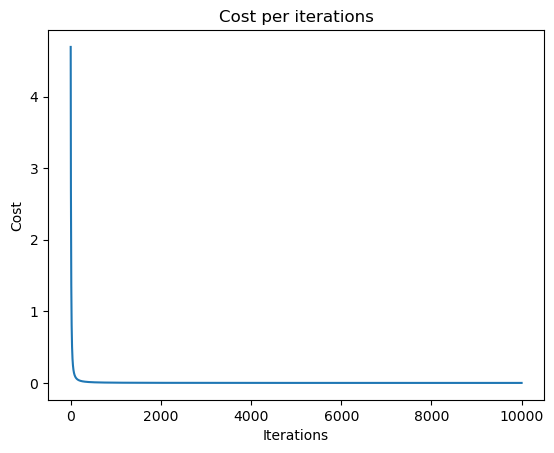

In [16]:
plt.plot(range(num_iterate), cost)
plt.title("Cost per iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")

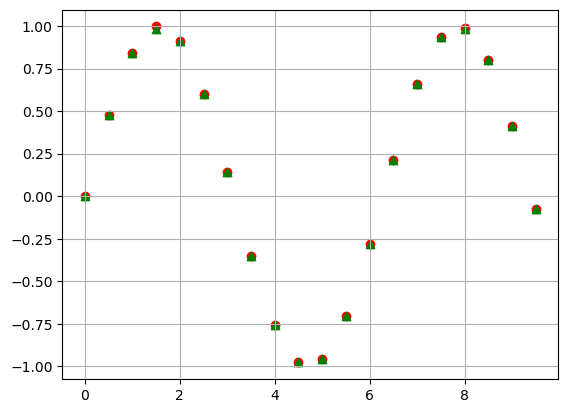

In [17]:
fig =plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.scatter(X, Y, color='red', marker='o') #real Y = sinx plotted as red circles
ax.scatter(X,  A2, color='green', marker='^') #output of our neural network as green triangles

# done!